In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загружаем набор данных
data = pd.read_csv('task-3-dataset.csv')  # Предполагается, что файл reviews.csv с текстами и метками

# Разделяем данные на текстовые отзывы и метки
texts = data['отзывы'].values
labels = data['разметка'].values

# Разбиваем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {len(X_train)}")
print(f"Тестовая выборка: {len(X_test)}")


Обучающая выборка: 168
Тестовая выборка: 42


In [4]:

print(X_train)

['Для меня не хватает яркости, слишком большой'
 'он хорош! шустрый стильный, и что не мало важно камера просто отпад'
 'хорошая камера, долго держит зарядку, лучший телефон'
 'Очень доволен телефоном, но телефон не для всех и не всем по карману.'
 'Тормозит даже в браузере, про игры вообще молчу. Батарея вовсе не 6 000.'
 'Всего через 10 минут использования весь корпус телефона начинает очень сильно нагреваться.'
 'Первое впечатление отличное, надеюсь и дальше будет таким'
 'Достоинств много, я даже не буду перечислять' 'не верю, это всё обман'
 'очень слабый аккумулятор - еле хватает на день не очень интенсивного использования'
 'Для игр слабоват' 'телефон внешне очень красивый'
 'Использовала его примерно год. Реклама и постоянные уведомления - это просто кошмар. Через неделю после использования звук у динамика стал настолько глухим, что я практически не слышала собеседника. Периодически сам перезагружается.'
 'достойный аппарат с таким экраном'
 'Телефоном очень довольна, удобный, 

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Настройка токенизатора
max_words = 10000  # Максимальное количество уникальных слов
max_len = 100  # Максимальная длина последовательности

# Создаём токенизатор
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Преобразуем тексты в последовательности чисел
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг последовательностей, чтобы все имели одинаковую длину
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

print(f"Размерность обучающего набора: {X_train_pad.shape}")
print(f"Размерность тестового набора: {X_test_pad.shape}")


Размерность обучающего набора: (168, 100)
Размерность тестового набора: (42, 100)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Параметры модели
embedding_dim = 128  # Размерность векторного представления слов

# Создаём модель
model = Sequential()

# Слой векторизации слов (embedding layer)
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

# LSTM слой
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Полносвязный слой для классификации
model.add(Dense(1, activation='sigmoid'))  # Выходная активация - sigmoid для бинарной классификации

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Строим модель
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Обучаем модель
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test))

# Сохраняем модель
model.save('sentiment_model.h5')


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.5444 - loss: 0.6919 - val_accuracy: 0.6667 - val_loss: 0.6771
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.5619 - loss: 0.6817 - val_accuracy: 0.6667 - val_loss: 0.6594
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.5522 - loss: 0.6719 - val_accuracy: 0.6667 - val_loss: 0.6483
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.5786 - loss: 0.6529 - val_accuracy: 0.6667 - val_loss: 0.6369
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.6083 - loss: 0.6285 - val_accuracy: 0.6667 - val_loss: 0.6234
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.7236 - loss: 0.6001 - val_accuracy: 0.7143 - val_loss: 0.6073
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.8603 - loss: 0.5328 - val_accuracy: 0.6905 - val_loss: 0.5685
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.8838 - loss: 0.4392 - val_accuracy: 0.6190 - val_loss:

In [13]:
# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Тестовая точность: {accuracy * 100:.2f}%")

# Пример предсказания
sample_text = ["ПМ прекрасно лежит в руке. Рекомендую"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_len)

prediction = model.predict(sample_pad)
print("Положительный отзыв!" if prediction[0] > 0.5 else "Отрицательный отзыв!")
print(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7475 - loss: 0.4464 
Тестовая точность: 76.19%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Положительный отзыв!
[[0.8891628]]


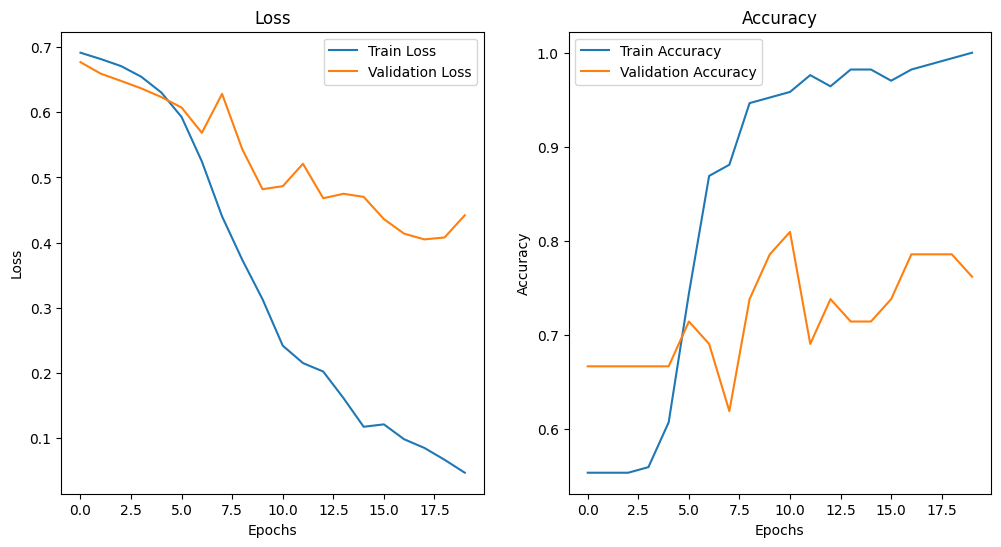

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history

# График потерь
plt.figure(figsize=(12, 6))

# Потери на обучении
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Точность на обучении
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Показываем графики
plt.show()

In [15]:
#набор данных для проверки
data = pd.read_csv('test50.csv')  # Предполагается, что файл reviews.csv с текстами и метками

# Разделяем данные на текстовые отзывы и метки
texts = data['Отзывы'].values




In [18]:
sample_seq = tokenizer.texts_to_sequences(texts)
sample_pad = pad_sequences(sample_seq, maxlen=max_len)

prediction = model.predict(sample_pad)
print(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.39212215]
 [0.2301977 ]
 [0.86684835]
 [0.97991073]
 [0.0649981 ]
 [0.1594595 ]
 [0.2130319 ]
 [0.60619766]
 [0.26953182]
 [0.04544835]
 [0.8234676 ]
 [0.22770908]
 [0.08338767]
 [0.6956959 ]
 [0.12757865]
 [0.88096124]
 [0.35494602]
 [0.57327276]
 [0.5321334 ]
 [0.88727427]
 [0.25677356]
 [0.51663285]
 [0.79054415]
 [0.9442397 ]
 [0.0698201 ]
 [0.9828477 ]
 [0.9876638 ]
 [0.32184958]
 [0.96175617]
 [0.8459389 ]
 [0.05941303]
 [0.19469617]
 [0.46739674]
 [0.85838807]
 [0.05028396]
 [0.05260272]
 [0.9246748 ]
 [0.30964142]
 [0.8757365 ]
 [0.11933009]
 [0.9977889 ]
 [0.48615026]
 [0.9370519 ]
 [0.46935415]
 [0.96182996]
 [0.92692363]
 [0.62984693]
 [0.98425704]
 [0.34545517]
 [0.72193295]]
